In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [2]:
from data_cube import DataCube

In [3]:
dc = DataCube(subjects=["10", "20"],
              gestures=["1", "2", "3", "4"],
              channels=["2", "4", "5", "6", "8"],
              data_grp="parsed")
dc.load_data()
dc.get_max_obs()
dc.get_min_obs()

In [4]:
# Create SSMs

class SSM:
    
    def __init__(self, time_series, metric):
        """
        CURRENTLY SUPPORTS SCALARS
        time series - (t x 1+m) numpy array where t is time series and 1+m is time index + number of modalities
        metric - metric to be used in generating SSMS (can also be a similarity kernel)
        """
        self.tidx = time_series[:, 0].astype("int32") # time index
        self.mods = time_series[:, 1:] # modalities
        self.metric = metric
        self.n_obs = self.tidx.size # number of obs
        self.n_mods = self.mods.shape[1] # number of modalitites
        self.array = np.zeros(shape=(self.n_mods, self.n_obs, self.n_obs))
        
        
    def calc_SSM(self):
        """
        calculate SSM
        """
        for m in range(self.n_mods): # loop over modalities
            for i in range(self.n_obs): # loop over observations in m
                for j in range(self.n_obs):
                    if i < j: # fill lower triangle only
                        self.array[m, i, j] = self.metric(self.mods[i, m], self.mods[j, m])
            self.array[m, :, :] = self.array[m, :, :] + self.array[m, :, :].T

In [5]:
mtrc = lambda i,j: np.sqrt((i-j)**2)
D = SSM(dc.data_set["10"]["2_0_1"][:, :-1], mtrc)
D.calc_SSM()
E = SSM(dc.data_set["10"]["2_0_2"][:, :-1], mtrc)
E.calc_SSM()
F = SSM(dc.data_set["20"]["2_0_1"][:, :-1], mtrc)
F.calc_SSM()
G = SSM(dc.data_set["20"]["2_0_2"][:, :-1], mtrc)
G.calc_SSM()
H = SSM(dc.data_set["10"]["1_0_1"][:, :-1], mtrc)
H.calc_SSM()
I = SSM(dc.data_set["20"]["4_0_1"][:, :-1], mtrc)
I.calc_SSM()

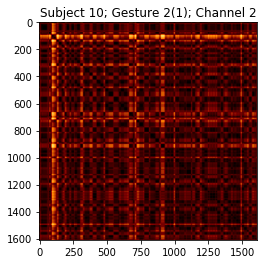

In [6]:
plt.imshow(D.array[0, :, :], interpolation = 'gaussian', cmap = 'afmhot')
plt.title("Subject 10; Gesture 2(1); Channel 2")
plt.savefig("./figures/pres_figs/ssm_s10_g21_c2")

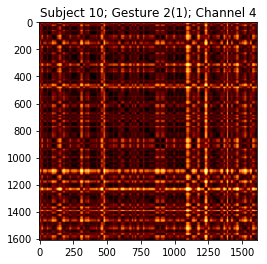

In [8]:
plt.imshow(D.array[1, :, :], interpolation = 'gaussian', cmap = 'afmhot')
plt.title("Subject 10; Gesture 2(1); Channel 4")
plt.savefig("./figures/pres_figs/ssm_s10_g21_c4")

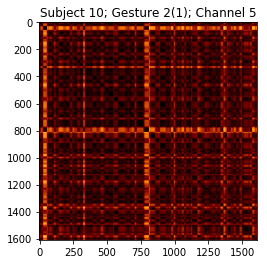

In [9]:
plt.imshow(D.array[2, :, :], interpolation = 'gaussian', cmap = 'afmhot')
plt.title("Subject 10; Gesture 2(1); Channel 5")
plt.savefig("./figures/pres_figs/ssm_s10_g21_c5")

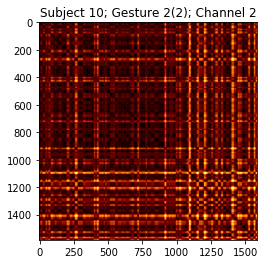

In [10]:
plt.imshow(E.array[0, :, :], interpolation = 'gaussian', cmap = 'afmhot')
plt.title("Subject 10; Gesture 2(2); Channel 2")
plt.savefig("./figures/pres_figs/ssm_s10_g22_c2")

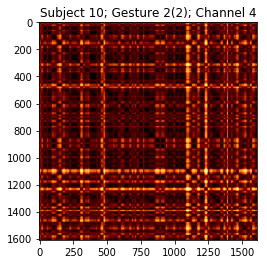

In [11]:
plt.imshow(D.array[1, :, :], interpolation = 'gaussian', cmap = 'afmhot')
plt.title("Subject 10; Gesture 2(2); Channel 4")
plt.savefig("./figures/pres_figs/ssm_s10_g22_c4")

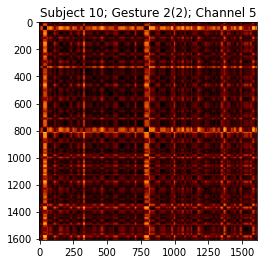

In [12]:
plt.imshow(D.array[2, :, :], interpolation = 'gaussian', cmap = 'afmhot')
plt.title("Subject 10; Gesture 2(2); Channel 5")
plt.savefig("./figures/pres_figs/ssm_s10_g22_c5")

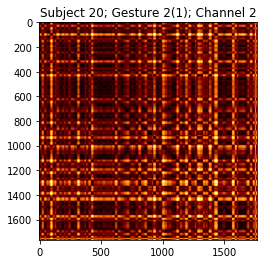

In [13]:
plt.imshow(F.array[0, :, :], interpolation = 'gaussian', cmap = 'afmhot')
plt.title("Subject 20; Gesture 2(1); Channel 2")
plt.savefig("./figures/pres_figs/ssm_s20_g21_c2")

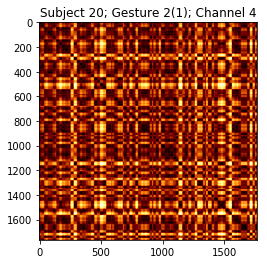

In [14]:
plt.imshow(F.array[1, :, :], interpolation = 'gaussian', cmap = 'afmhot')
plt.title("Subject 20; Gesture 2(1); Channel 4")
plt.savefig("./figures/pres_figs/ssm_s20_g21_c4")

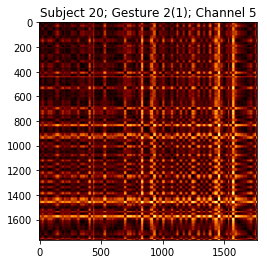

In [15]:
plt.imshow(F.array[2, :, :], interpolation = 'gaussian', cmap = 'afmhot')
plt.title("Subject 20; Gesture 2(1); Channel 5")
plt.savefig("./figures/pres_figs/ssm_s20_g21_c5")

`griddata(points, values, (grid_x, grid_y), method='nearest')`

In [ ]:
# sample from current matrix
n_smp = 1000
smp = np.random.choice(np.arange(n_smp), size=2*n_smp, replace=True)
smp = smp_idx.reshape(-1, 2)
# Similarity matrix values
vals = np.zeros(n_smp)
for i in range(n_smp):
    vals[i] = I.array[4, smp[i, 0], smp[i, 1]]
# grid on which we will interpolate
grid_x, grid_y = np.mgrid[0:dc.max_obs, 0:dc.max_obs]

In [ ]:
grid_z0 = griddata(smp, vals, (grid_x, grid_y), method='nearest')

In [ ]:
plt.matshow(grid_z0)
plt.show()

---

In [ ]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [ ]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j]

In [ ]:
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

In [ ]:
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')

In [ ]:
plt.matshow(grid_z0)

In [ ]:
gx, gy = np.mgrid[0:dc.min_obs, 0:dc.min_obs]